In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = '../results/Complete_errors_stored25_size10_spars0.1_ALL.npz'

data = np.load(filename)

In [5]:
print(data.keys())
print(data['FI_N'].shape)

['FL_N', 'FI_N', 'FLT_N', 'trad_80_N', 'FIH_N']
(200, 600, 25)


In [6]:
def plot_stuff_together(what, label):
    # plt.subplot(1, 2, axisn)
    center = np.median(what, axis=0)
    edges = np.percentile(what, [25, 75], axis=0)
    plt.gca().color_cyle(plt.cm.viridis(np.arange(what.shape[-1])/what.shape[-1]))
    l = plt.plot(center, label=label, linewidth=2.5, cmap=plt.cm.viridis)
    c = l[0].get_color()
    # plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color=c)
    # plt.plot(edges.T, color=c, alpha=.2)
    plt.ylabel('Pixel Error %')
    plt.ylim([0, 1.1])
    plt.legend(loc='lower right')
    # plt.xlim([-1, 2000])

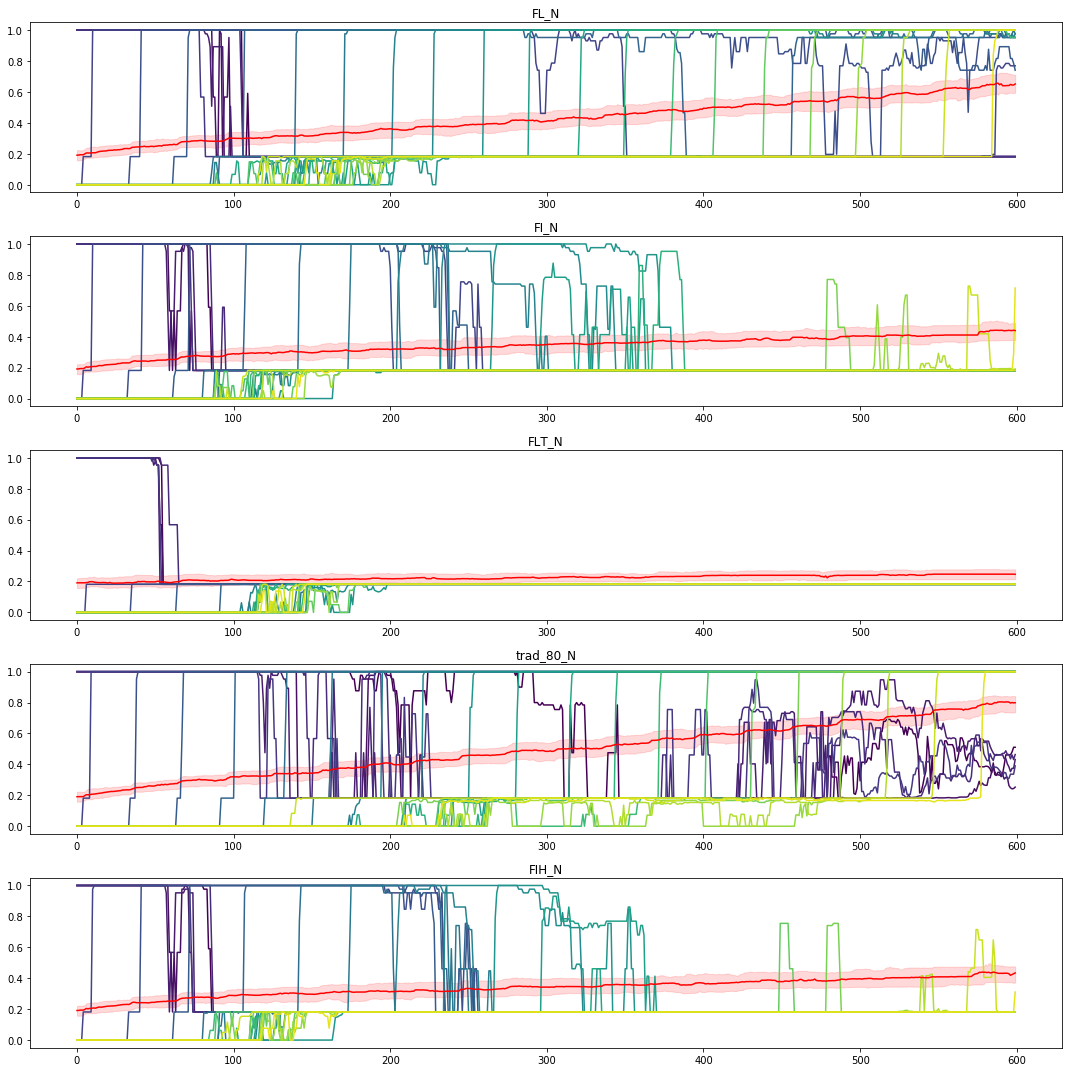

In [7]:
plt.figure(figsize=(15, 15))
for j, k in enumerate(data.keys()):
    plt.subplot(len(data.keys()), 1, j+1)
    plt.title(k)
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    for i, p in enumerate(center.T):
        plt.plot(p, c=plt.cm.viridis(i/n))
    plt.plot(np.median(data[k].mean(-1), axis=0), c='r')
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color='r')
plt.tight_layout()